# Predicting Heart Disease using Machine Learning 

This notebook looks into using various Python - based machine learning and Data Science libraries in an attemp to build a ML model capable of predicting wheter or not someone has hart disease based on their medical attributes.

The following approaches will be taken:
1. Problem definition
2. Data 
3. Evaluation 
4. Feautes
5. Modelling
6. Experimentation 

## 1. Problem definition 

> Given clinical parameters about a patient, can we predict whether or not a patient has a heart disease?

## 2. Data 

The original data came from Cleavland data from the UCI ML Repository.

## 3. Evaluation

> If we can reach 95% accuracy at predicting during proof of consept, we will persue the project.

## 4. Features

**Create data dictionary** 
1. age - age in years
2. sex - (1 = male; 0 = female)
3.

14.

Preparing all the tools we need:

In [4]:
import sys

In [6]:
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\stein\Documents\ZTM_Udemy\heart_disease_project\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.12.7          |  py310haa95532_0         149 KB
    seaborn-0.12.2             |  py310haa95532_0         492 KB
    ------------------------------------------------------------
                                           Total:         642 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py310haa95532_0 

The following packages will be UPDATED:

  certifi                         2022.9.24-py310haa95532_0 --> 2022.12.7-py310haa95532_0 




seaborn-0.12.2       | 492 KB    |            |   0% 

certifi-2022.12.7    | 149 KB    |            |   0% 

certifi-2022.12.7    | 149 KB    | #      

In [16]:
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\stein\Documents\ZTM_Udemy\heart_disease_project\env

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  fftw               pkgs/main/win-64::fftw-3.3.9-h2bbff1b_1 
  icc_rt             pkgs/main/win-64::icc_rt-2022.1.0-h6049295_2 
  joblib             pkgs/main/win-64::joblib-1.1.1-py310haa95532_0 
  scikit-learn       pkgs/main/win-64::scikit-learn-1.1.3-py310hd77b12b_0 
  scipy              pkgs/main/win-64::scipy-1.9.3-py310h86744a3_0 
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.2.0-pyh0d69192_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Windows 64-bit packages of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install sc

In [1]:
#Regular EDA and plotting libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Models from sklearn:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
!conda list scikit

# packages in environment at C:\Users\stein\anaconda3:
#
# Name                    Version                   Build  Channel
scikit-image              0.19.2           py39hf11a4ad_0  
scikit-learn              1.0.2            py39hf11a4ad_1  
scikit-learn-intelex      2021.5.0         py39haa95532_0  
scikit-plot               0.3.7                    pypi_0    pypi


# Load Data 

In [4]:
df = pd.read_csv("heart-disease.csv")

In [5]:
df.shape #(rows, columns)

(303, 14)

# EDA
The goal here is to find out more about the data and become a subject matter expert on dataset you're working with. 

1. What questions are you trying to solve?
2. What kind of data do we have how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are your outliers and why should you care about them?
5. How can you add or change features to get more out of your data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

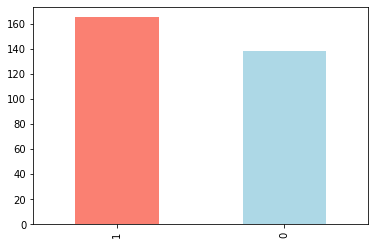

In [8]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Start comparing different features with the target variable
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


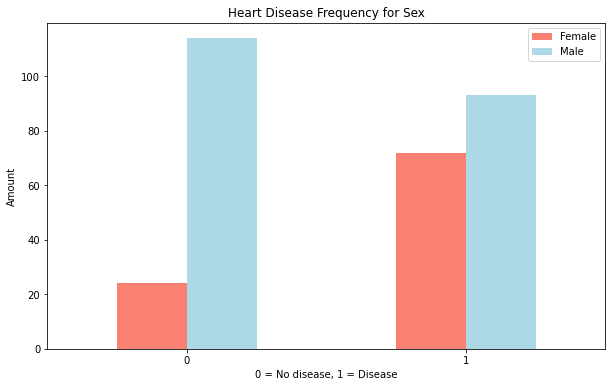

In [14]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

# Age vs Max Heart Rate for Heart Disease

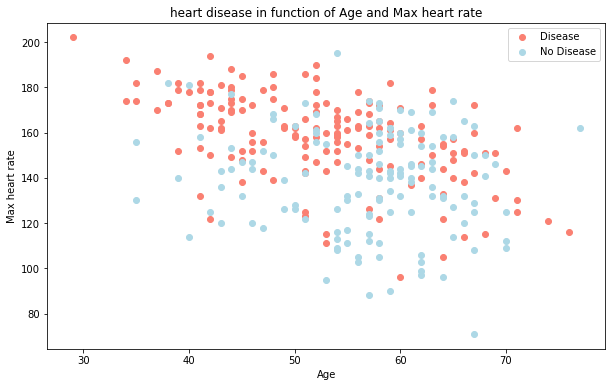

In [15]:
plt.figure(figsize = (10,6))

#Scatter with pos first
plt.scatter(df.age[df.target == 1], df.thalach[df.target ==1], c = "salmon")

#Scatter with neg examples
plt.scatter(df.age[df.target ==0], df.thalach[df.target ==0], c = "lightblue");
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.title("heart disease in function of Age and Max heart rate")
plt.legend(["Disease", "No Disease"]);

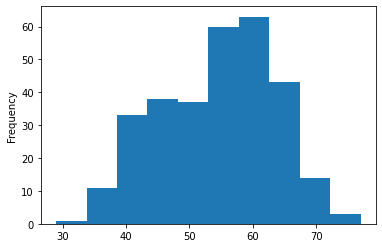

In [16]:
# Check the distribution of the Age column with a histogram
#ONE OF THE BEST WAYS TO DISCOVER OUTLIERS
df.age.plot.hist();

### Heart Disease frequency per chest pain type

In [17]:
pd.crosstab(df.cp, df.target)
#We're seeing some interesting things. 
# It's raising questions about the data.
#Here i can consult a proffecional from the field to make sense.

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


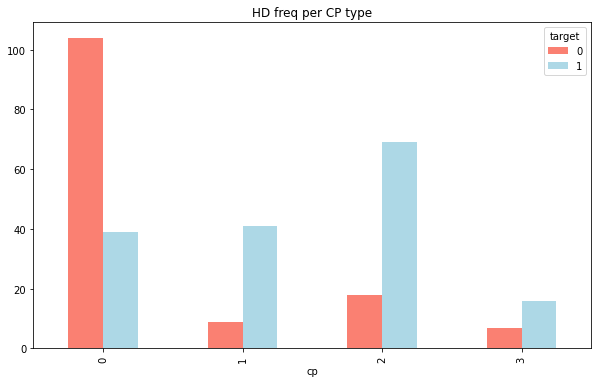

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6), color=["salmon","lightblue"])

#Add some communication
plt.title("HD freq per CP type");

# checking the correlation between independant variables to the target

In [19]:
#Building a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


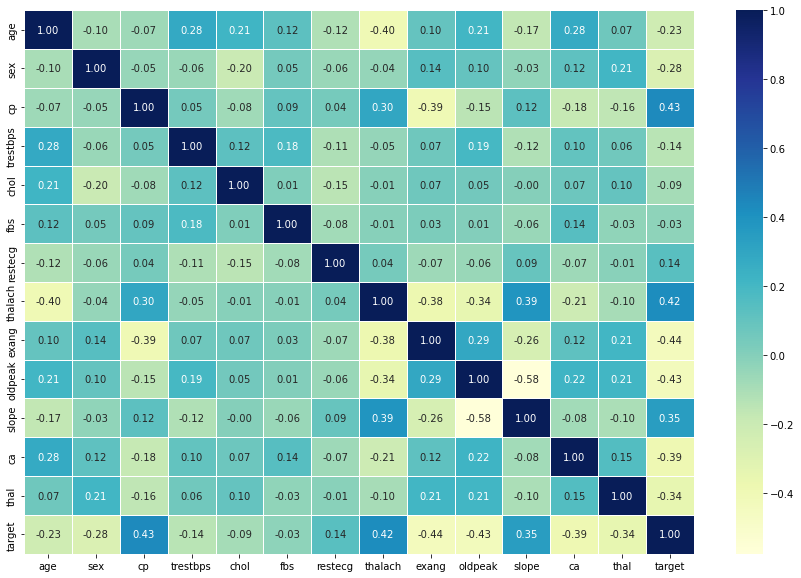

In [20]:
# lets make out corr matrix a little prettier
corr_matrix = df.corr()
fig, ax  = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                cmap = "YlGnBu");

# Modelling 
## Preparing the data for ML

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = df.drop("target", axis = 1)
y = df["target"]

In [23]:
#Split data into train and test sets
np.random.seed(42)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_t

In [16]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into train and test sets, it's time to build a ML model.

We'll train it (find the patterns) on the training set.
And test it on the test set.

We're going to try 3 different models:
1. Logistic Regression
2. K-Nearest- Neighbours Classifier
3. Random Forest Classifier 

In [17]:
# Put models in a dictionary
models  = {"Logistic REgression": LogisticRegression(),
           "KNN": KNeighborsClassifier(),
           "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluated given ML models
    models : a dict of Scikit-Learn ML models
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\stein\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic REgression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

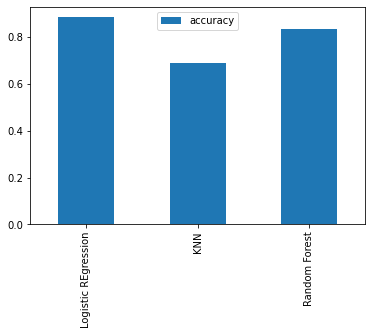

In [19]:
model_compare = pd. DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning (by hand)

In [20]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n neighbors
neighbors= range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through diff n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #update training scores list
    train_score.append(knn.score(X_train, y_train))
    
    #update the test scores list
    test_score.append(knn.score(X_test, y_test))

In [21]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [22]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


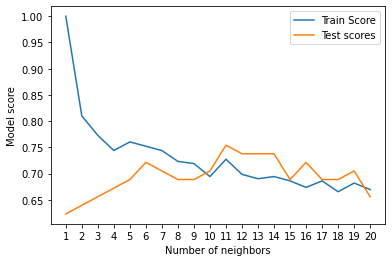

In [23]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")

plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score) *100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We'e going to tune:
* LogisticRegression()
* RandomForestClassifier()


In [24]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RFC
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3,5,10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [25]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions= log_reg_grid,
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)

# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

now we've tuned LogisticRegressiom, lets do the same for RandomForestClassifier

In [28]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
#fit
rs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
#Evaluate the randomized search RFC model
rs_rf.score(X_test, y_test)

0.8688524590163934

# Tuning with GridSearchCV 

In [31]:
#Different hp for our logisticREgression
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup grid hp search for LR
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

#fit
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
#evaluate the grid search LG model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 - score

.. and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [34]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
from sklearn import metrics

C:\Users\stein\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


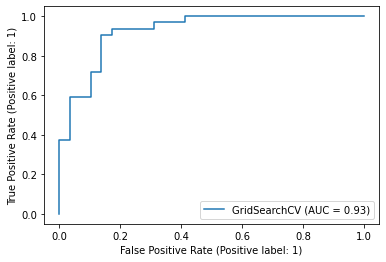

In [36]:
# ROC curve - comparing true positive rate to false positive rate

#Plot ROC curve and calculate AUC metric

metrics.plot_roc_curve(gs_log_reg, X_test,y_test)

In [37]:
#Confusion metrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


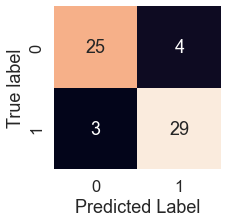

In [38]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test = y_test, y_preds = y_preds)
    

# lets get a classification report as well as cross-validated precision, recall and f1 score

In [39]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



a model which produces NO False Negatives has recall = 1
a model which produces NO False Positives has precision = 1
F1 is combination of precision and recall
support 
macro avg - does NOT take class imbalance into account so if you have imbalance take this into account.
weighted avg - each metric is calculated in respect to the number of samples each has

Look up the Classification Report documentation!!!

# Calculate evaluation metrics using cross-validation

using cross_val_score()

In [40]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# create a new classifier with best params:
clf = LogisticRegression(C=0.20433597178569418, solver = "liblinear")

In [66]:
# cross validated accuracy
cv_acc = cross_val_score(clf, X, y, scoring = "accuracy" )
cv_acc = np.mean(cv_acc)

In [67]:
# cross validated precision
cv_precision = cross_val_score(clf, X, y, scoring = "precision" )
cv_precision = np.mean(cv_precision)

In [68]:
#cross validated recall
cv_recall = cross_val_score(clf, X, y, scoring = "recall" )
cv_recall = np.mean(cv_recall)

In [69]:
#cross validated f1-score
cv_f1 = cross_val_score(clf, X, y, scoring = "f1" )
cv_f1 = np.mean(cv_f1)

In [72]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall,
                           "F1": cv_f1}, index = [0])

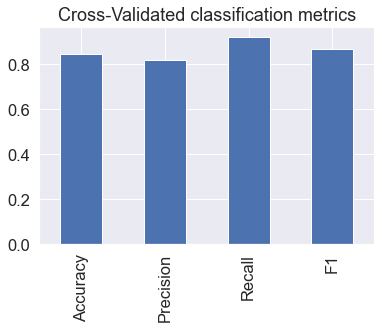

In [75]:
cv_metrics.T.plot.bar(title = "Cross-Validated classification metrics",
                      legend = False);

### Feauture Importance

Feature importance is another way of asking "which features contributed most to the outcome of the model and how did they contribute?"

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


*I need to complete this section 

# 6. Experimentation

If you didn't hit your evaluation metric yet... ask yourself...

* could you collect more data?
* could you try a better model? like CatBoost or XGBoost?
* could you improve the currect models?

If your model is good enough how would you export it and share it with other?
